<a href="https://www.kaggle.com/code/sevvalozger/apple-stock-prices-forecast?scriptVersionId=196246782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/apple-stock-prices-20152020/AAPL.csv


In [2]:
df = pd.read_csv("/kaggle/input/apple-stock-prices-20152020/AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 

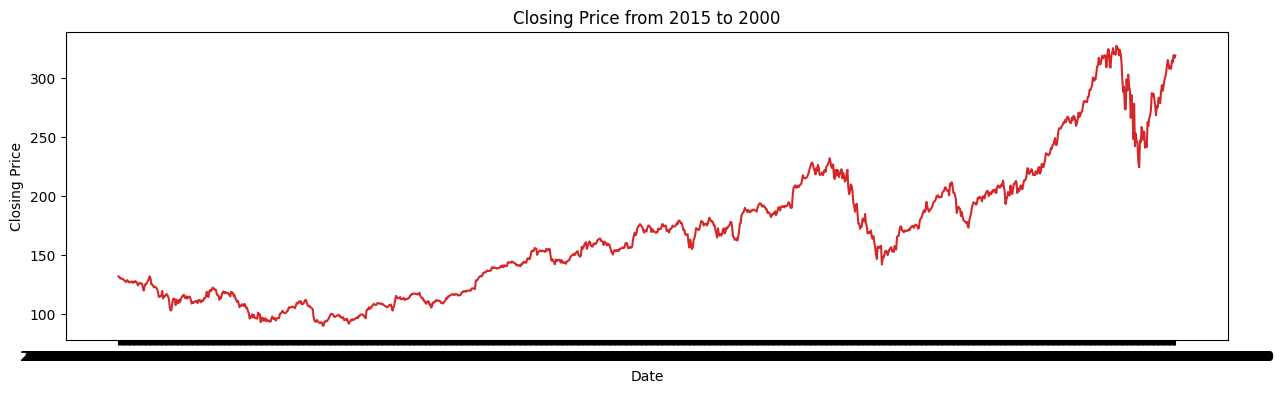

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Closing Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['date'], y=df['close'], title='Closing Price from 2015 to 2000')

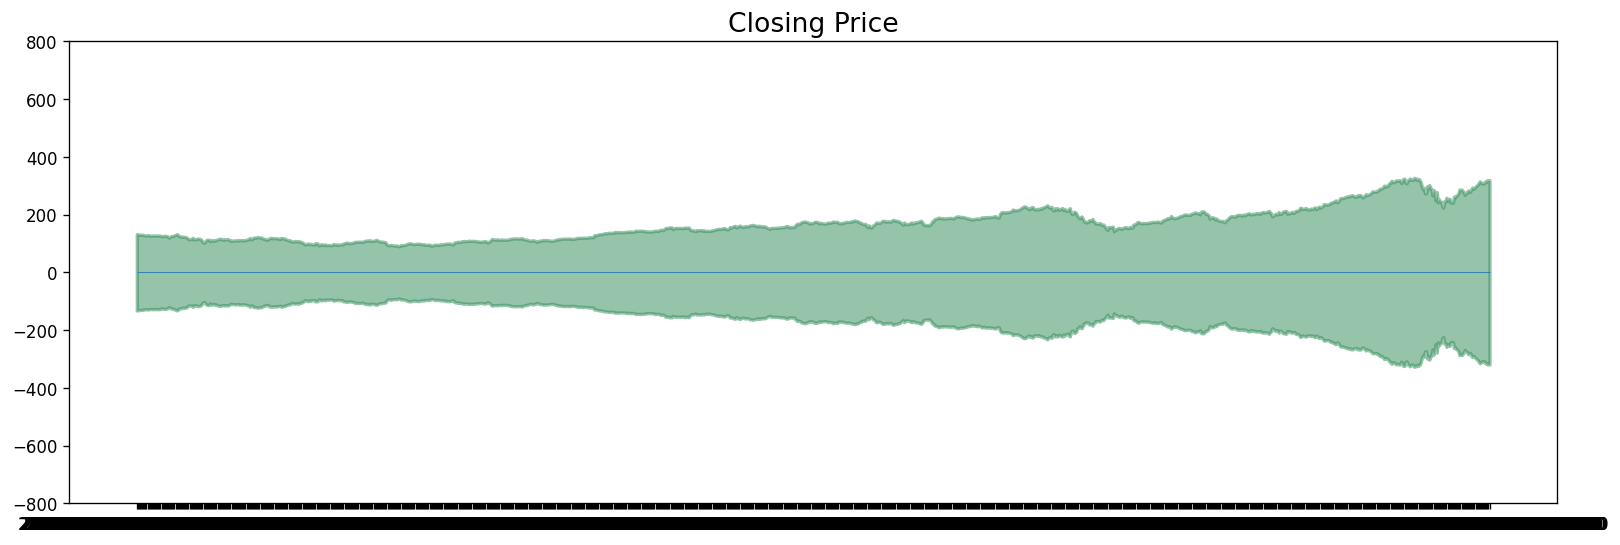

In [5]:
x = df['date'].values
y1 = df['close'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Closing Price', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['date']), xmax=np.max(df['date']), linewidth=.5)
plt.show()

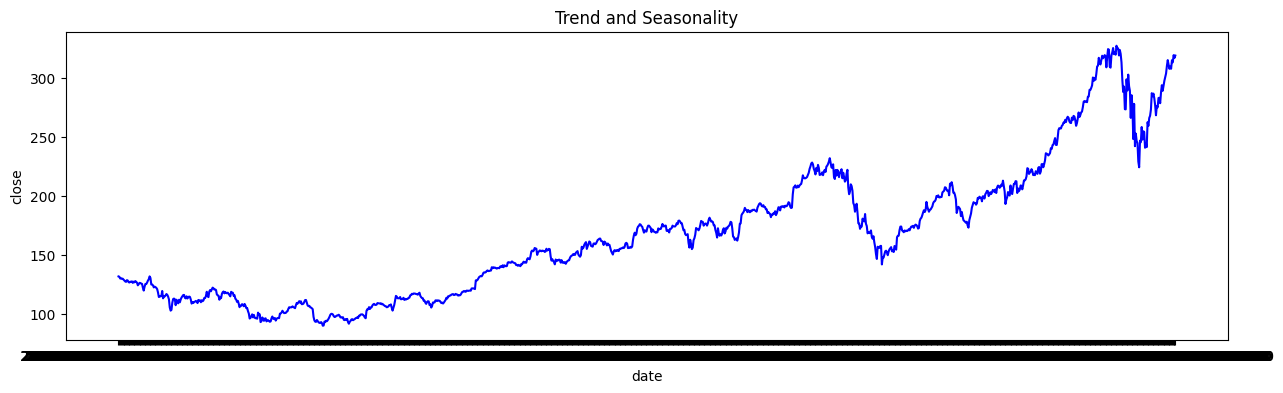

In [6]:
def plot_df(df, x, y, title="", xlabel='date', ylabel='close', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['date'], y=df['close'], title='Trend and Seasonality')

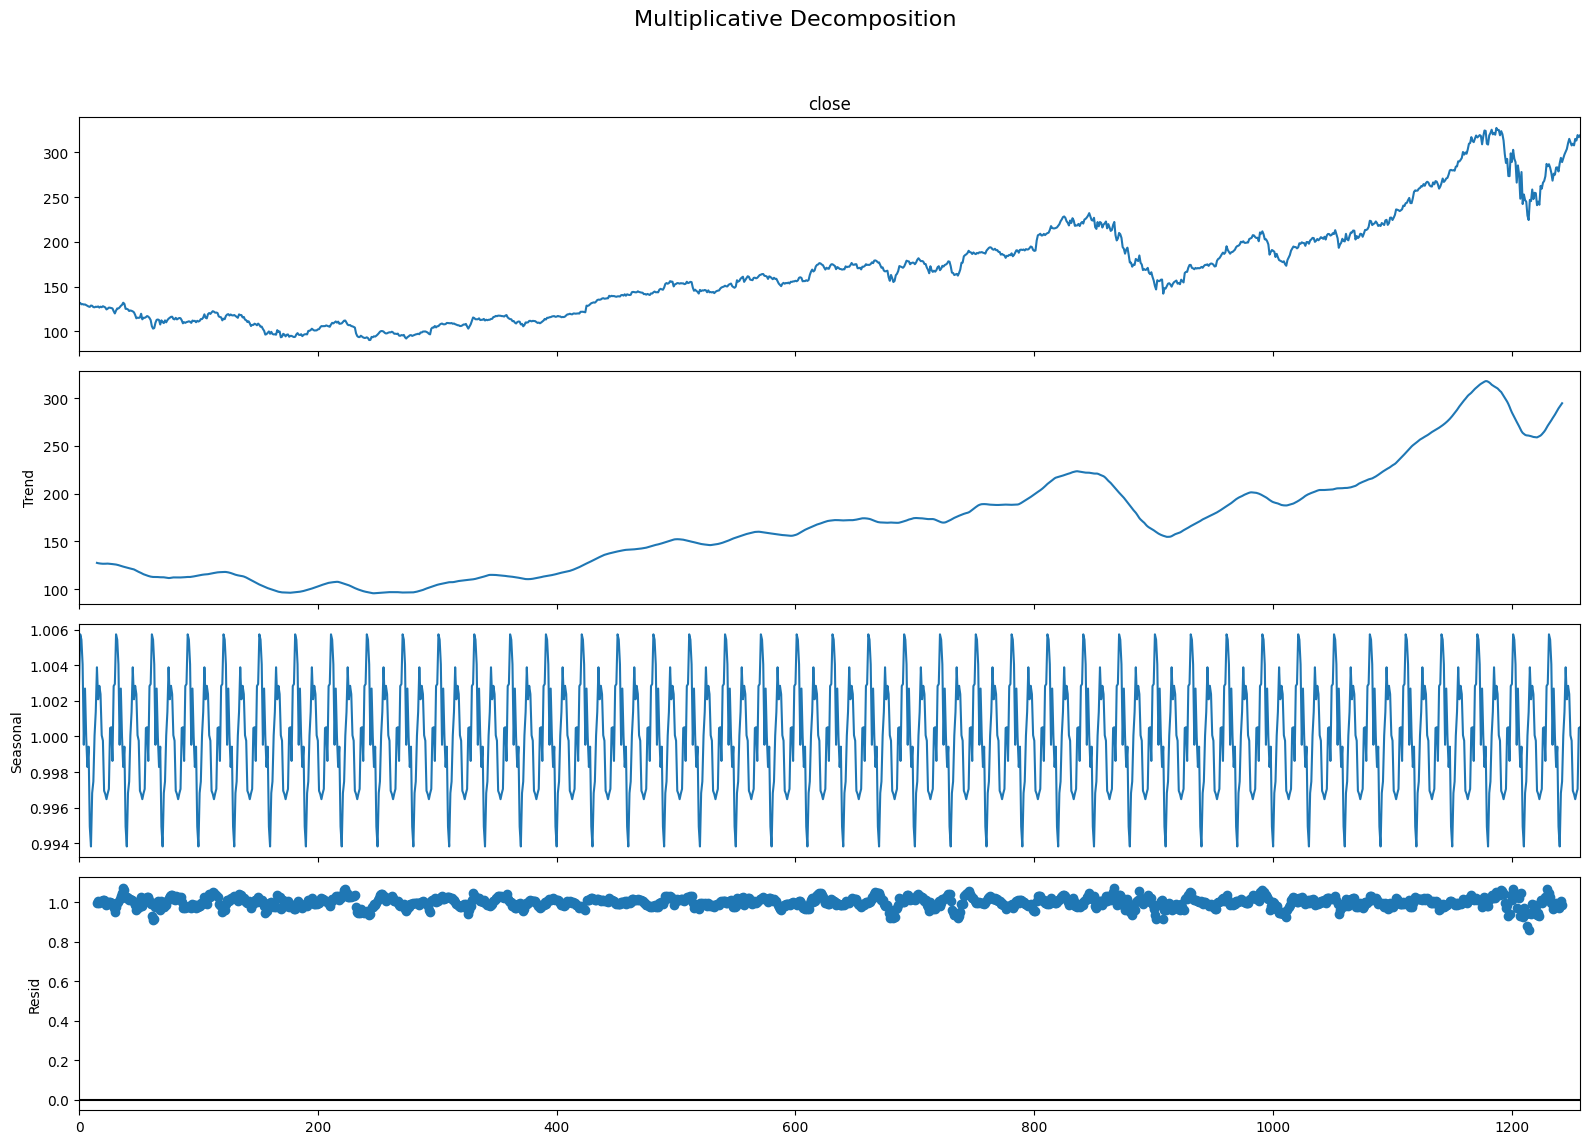

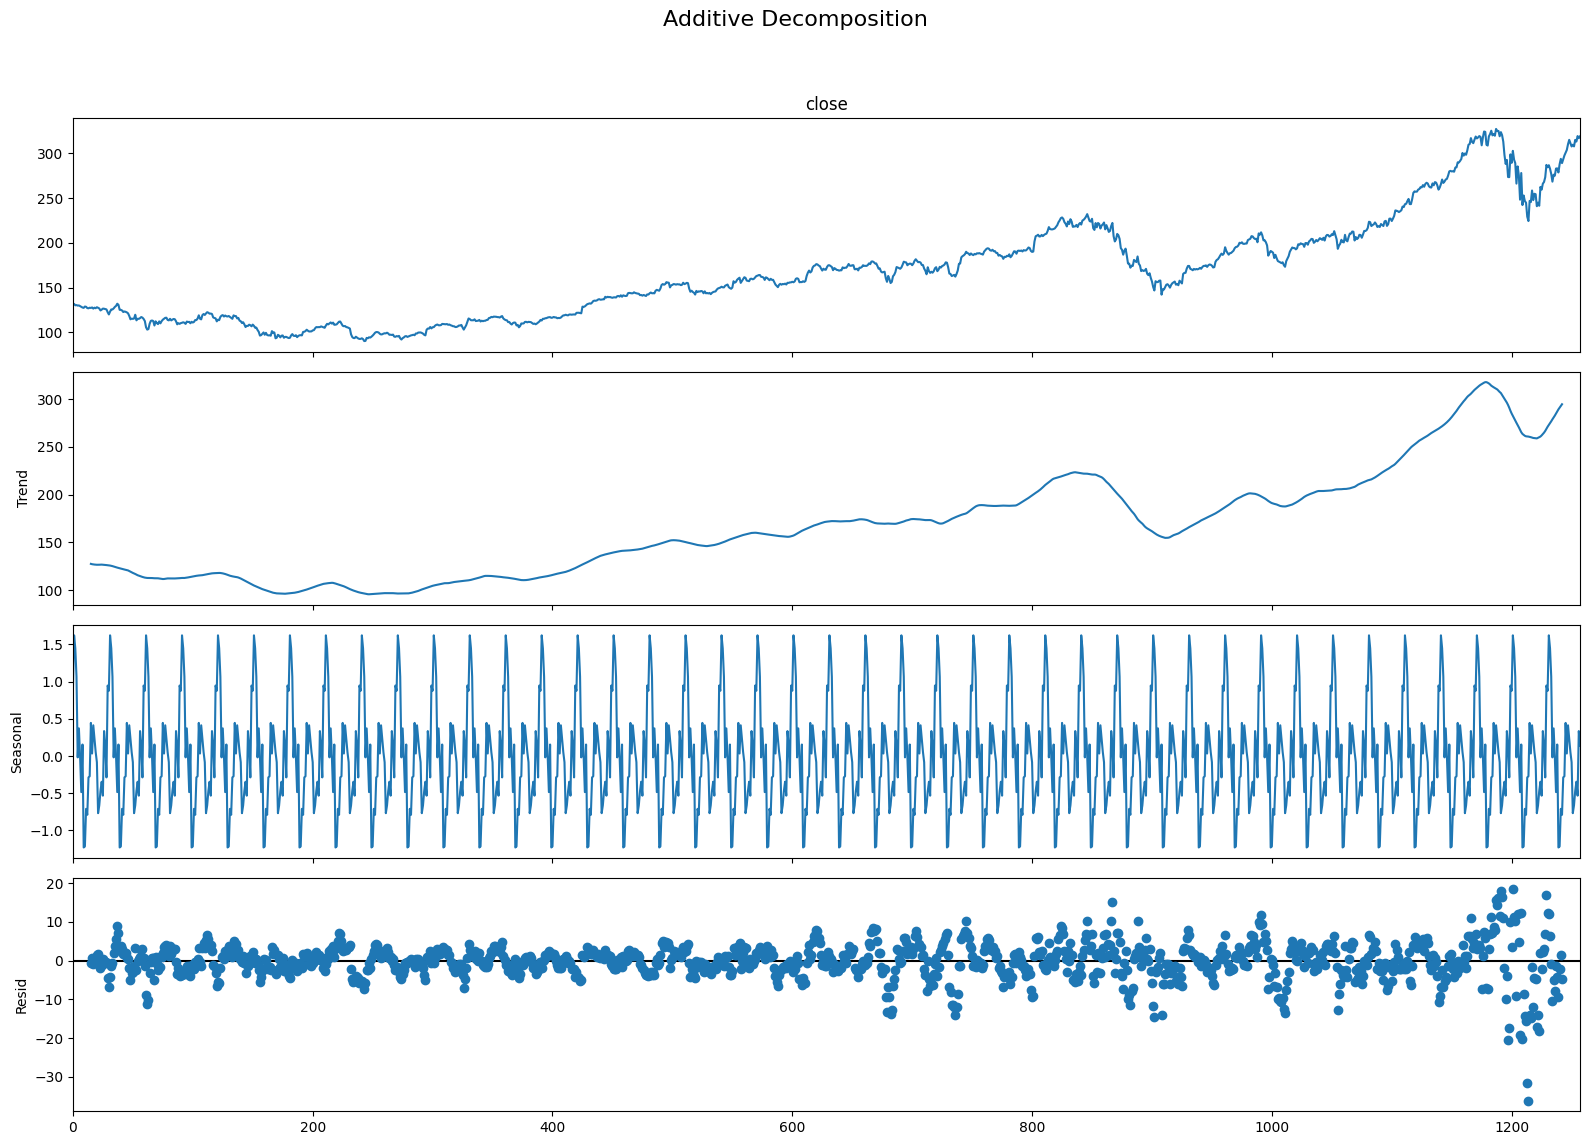

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['close'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['close'], model='additive', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Stationarity Test - ADF Test**

In [8]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
result = adfuller(df['close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.100130
p-value: 0.949426


In [9]:
# p-value > 0.05 and series is not stable
#Differencing 
df['diff_close'] = df['close'].diff().dropna()

In [10]:
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,diff_close
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0,NaN
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0,-0.265
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0,-1.500
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0,0.255
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0,-0.575


**ACF and PACF Analysis**

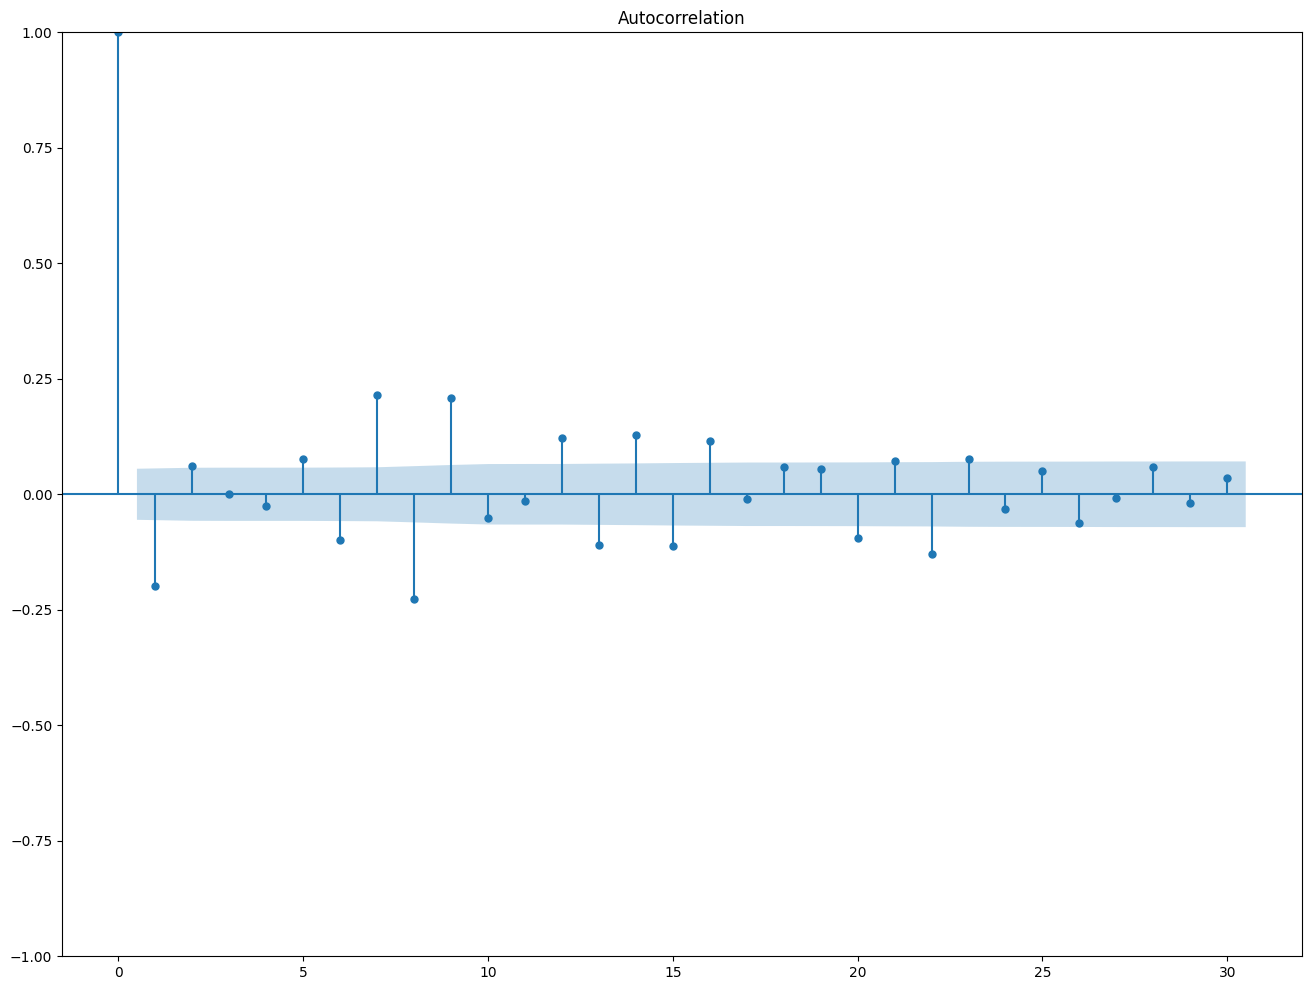

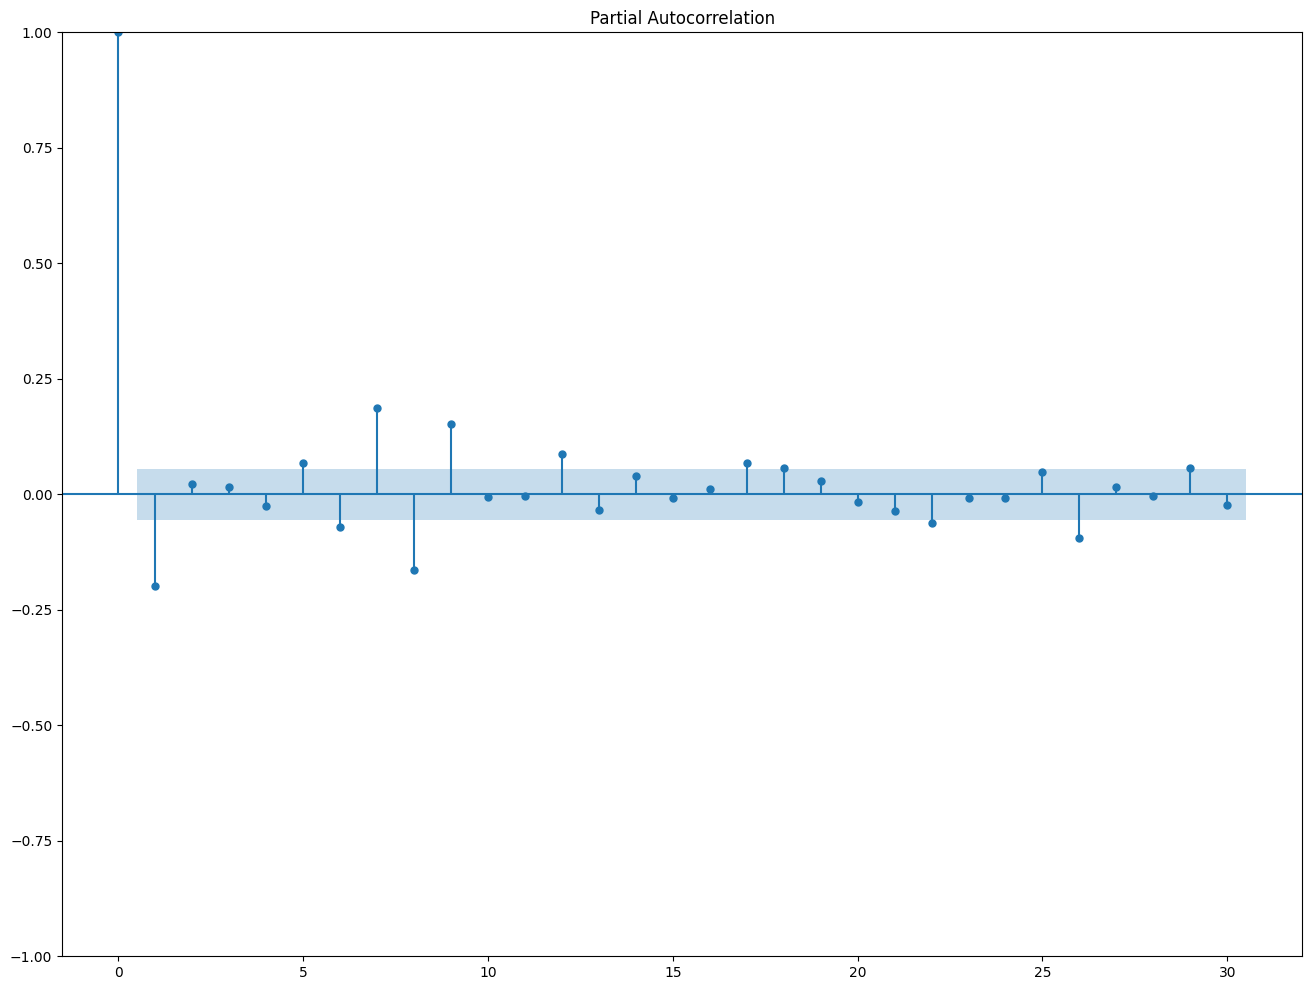

In [11]:
#Used to determine the appropriate number of lags when building forecast models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF Plots
plot_acf(df['diff_close'].dropna(), lags=30)
plot_pacf(df['diff_close'].dropna(), lags=30)
plt.show()

**ARIMA Model**

In [12]:
p = 1 # after this point the values start to decrease
q = 1 # after this point the values start to decrease
d = 1 # series is not stable

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model 
model = ARIMA(df['close'], order=(p, d, q))
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)
print(forecast)


1258    318.438644
1259    318.570745
1260    318.532082
1261    318.543398
1262    318.540086
1263    318.541055
1264    318.540771
1265    318.540855
1266    318.540830
1267    318.540837
Name: predicted_mean, dtype: float64


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['close'][-10:], forecast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.521


In [15]:
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(df['close'][-10:], forecast)
print(f"MSE: {mse}")
mae = mean_absolute_error(df['close'][-10:], forecast)
print(f"MAE: {mae}")

MSE: 42.525153663885646
MAE: 5.3015919330991945


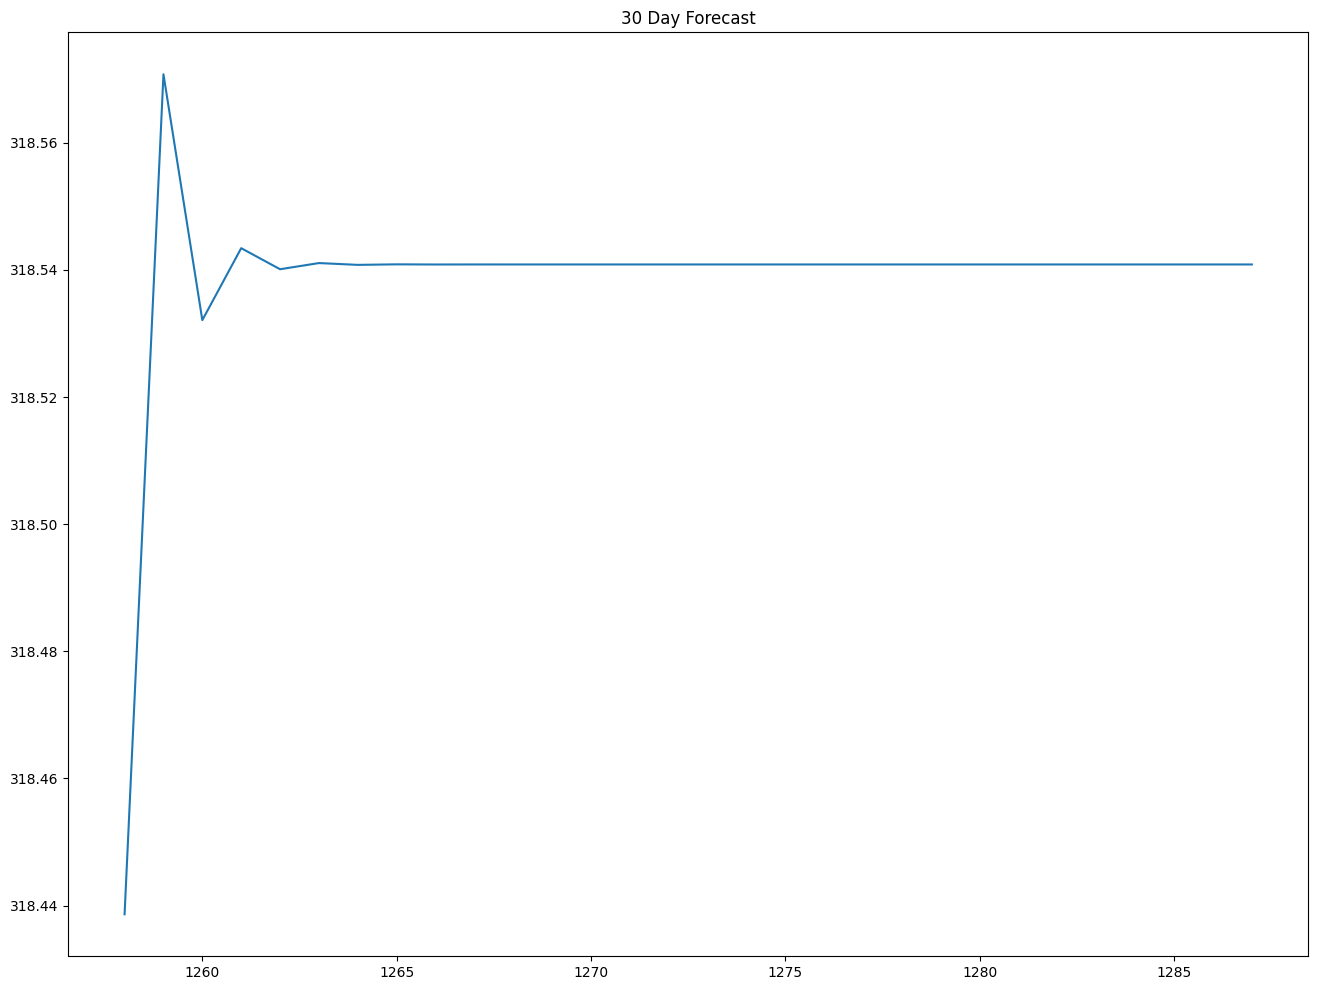

In [16]:
future_forecast = model_fit.forecast(steps=30)
plt.plot(future_forecast)
plt.title("30 Day Forecast")
plt.show()

Since the RMSE, MSE and MAE values are in the $300-$400 range at closing prices, these errors can be considered reasonable.